In [1]:
#Importing the relevant libraries: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Computational Physics Midterm Exam: Spandan Pandya 

### Problem 1

$\textbf(a)$ The public IP adress for my device was found to be 10.2.36.57 using the network port on the computer.Therefore in terms of A,B,C,D:

$$A=10,B=2,C=36,D=57$$

$\textbf(b)$ In binary notation, our number can be represented as follows: 

$$A=2^1+2^3,B=2^1,C=2^5+2^4,D=2^5+2^4+2^3+2^0$$

In binary number forms these numbers are given as: 
$$A=00001010,B=00000010,C=00100100,D=00111001$$

$\textbf(c)$ Each block in IPv4 (A,B,C or D) represents a number between 0 and 256 $2^8$, this block can then permute with each number in the second block which also has $2^8$ numbers. Similarly, both these permute with the third block and the fourth block, each of them having $2^8$ unique numbers. Therefore the total number of unique numbers that can be generated are: 

$$\text{Devices}=2^8\times2^8\times2^8\times2^8=2^{32}$$

This indicates that there can be $2^{32}$ unique adresses. 

Note: The actual number may vary because of artificial specifications added to the list such as it being a private network or it being a local network. 

### Problem 2

#### Defining the functions that are to be integrated

In [2]:
def f1(x): #The function for the first part 
    return np.sqrt(x)/np.sin(x)

def f2(x): #The function for the second part 
    return np.sin(float(x))/float(x)

Something to notice in our functions is that these functions are NOT defined when x=0 hence to avoid the numerical error that will give NaN, we must define some "tolerance" as our 0 instead of 0. Hence our lower limit of integration must be replaced by some $\epsilon_0$ which is our considered zero. For the upper limit which is infinity in the second limit of the integral, we can again set an upper bound which we consider to be infinity. For the sake of this problem, $\epsilon_0=10^{-10}$ and $\epsilon_\infty=10^{20}$. The method of integration was done using the trapezoidal method combined with adaptive integration to include the tolerance $\epsilon=10^{-6}$. The following lines of code define the function for trapezoidal integration and adaptive integration. Our new limits for integration take the form:

$$\int_0^1 \frac{\sqrt{x}}{\sin x} d x=\int_{\epsilon_0}^1 \frac{\sqrt{x}}{\sin x} d x$$

$$\int_0^{\infty} \frac{\sin x}{x} d x=\int_{\epsilon_0}^{\epsilon_\infty}\frac{\sin x}{x}d x$$

In [3]:
#DEFINING TRAPEZOIDAL INTEGRATION
def trapezoid(f,a,b,N): #Takes the function and the limits with the number of iterations as input
    h=(b-a)/N #equally spaced step length
    i=1
    while i<N: 
        integral=(f(a)+f(b))/2 #first compute the half of the integral
        for i in range(1,N): #Excluding the first and the last value (0,N) 
            integral+=f(a+i*h) #For these values compute the functions value and add it to the integral
            i+=1
        return (integral*h) #Multiply overall integral by the step length

In [4]:
def adaptive(f,lower_limit,upper_limit,epsilon,N): 
        I_1=trapezoid(f,lower_limit,upper_limit,N) #Integrate normally 
        midpoint=(lower_limit+upper_limit)/2 # find midpoint
        I_2=trapezoid(f,lower_limit,midpoint,N)+trapezoid(f,midpoint,upper_limit,N) #integrate for same N but two divisions
        if abs(I_1-I_2)<epsilon: #If error is less than certain tolerance which our problem has 10^-6
            return I_1 #give the trapezoidal integration
        else:
            return adaptive(f,lower_limit,midpoint,epsilon,N)+adaptive(f,midpoint,upper_limit,epsilon,N) 
        #uses midpoint recursion so that it splits integration into smaller chunks and evaluates from them


In [5]:
#Constant parameters used throughout Q2: 
epsilon_0=10**(-10) #Considered 0
epsilon_inf=10**9 #Considered infty
upper_bound_1=1 #from problem
tolerance=10**(-6) #from problem
iterations_for_trapezoid=1000 #sufficient ammount for more accuracy 

In [6]:
#The first integral
print('I_1'+'='+str(adaptive(f1,epsilon_0,upper_bound_1,tolerance,iterations_for_trapezoid)))
#the second integral 
print('I_2'+'='+str(adaptive(f2,epsilon_0,epsilon_inf,tolerance,iterations_for_trapezoid)))

I_1=2.071310628149281
I_2=1.5707848611343855


In [7]:
for i in range(1,11):
    print('I_2'+'='+str(adaptive(f2,epsilon_0,10**(i),tolerance,iterations_for_trapezoid))+' '+'for infinity as 10 to the power'+' '+str(i))

I_2=1.6583469402268165 for infinity as 10 to the power 1
I_2=1.562224361508874 for infinity as 10 to the power 2
I_2=1.5702309706931066 for infinity as 10 to the power 3
I_2=1.5708909696847637 for infinity as 10 to the power 4
I_2=1.5708057887751037 for infinity as 10 to the power 5
I_2=1.5708272774845342 for infinity as 10 to the power 6
I_2=1.5708363507879564 for infinity as 10 to the power 7
I_2=1.5710925052319635 for infinity as 10 to the power 8
I_2=1.5707848611343855 for infinity as 10 to the power 9
I_2=1.5713524879152372 for infinity as 10 to the power 10


The first integral was evaluated to be 2.071311 whereas for the second integral with the apropriate upper limits was found to stabilise with 1.5708. There were occasional rounding off errors that were seen when the decimal places in binaries shifted. However 1.57 seems to be stable even for higher powers. If we notice the powers of 10 ranging from 3,7 we see that the value stabilises to 1.5708, but then oscillates again. We expect this stabilisation for higher values of our considered infinity as well. However, the computation was time consuming and hence is ommited here. 

### Problem 3

In [8]:
#integrating
#area of a circle 
N=100000 #Number of random number to be generated 
in_curve=np.zeros(N) #some array that defines the points inside the curve
out_curve=np.zeros(N) #points that do not lie on the curve
X=[] # x coordinates for points in between curves
Y=[] # y coordinates for points in between curves
W=[] # x coordinates for points outside curves
Z=[] # y coordinates for points outside curves
#CREATING A SQUARE WITH LENGTH 4 ON BOTH SIDES
x=np.random.uniform(-2,2,N) #generating random number between -2 and 2 because the complete figure lies between these
y=np.random.uniform(-2,2,N) #using this to model the y points
#CHECKING WHETHER POINTS LIE IN THE AREA OR NOT
for i in range(N):
    if (x[i]**2/2+y[i]**2/3<=1) and x[i]**2+y[i]**2>1:
#These are the conditions for  it to be an ellipse, but not be in the circle, so that it is in the area between the two
        in_curve[i]=1 #if a particle is in the condition then add 1 to the in curve array
        X.append(x[i]) #for visualisation purposes store x and y coordinate 
        Y.append(y[i])
    else:
        out_curve[i]=1 #add to the array for points outside the area
        W.append(x[i]) #store the coordinates for visualisation purposes
        Z.append(y[i])
Area=16*np.sum(in_curve)/(N) #we will get the ratio of areas which will be area_needed/16 where 16 is the area of square
print('The area between an ellipse and a circle for'+' '+str(N)+' iterations is'+'',Area)

The area between an ellipse and a circle for 100000 iterations is 4.56976


In [9]:
plt.scatter(X,Y,marker='o',c='k')
plt.scatter(W,Z,marker='o',c='white')
plt.gca().set_aspect('equal')
plt.title('Enclosed area between ellipse and circle (egg yolk)')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

The circle has a radius of 1 given by our equation whereas the ellipse has one semi major axis whose value is $\sqrt{2}$ and the other axis as $\sqrt{3}$. Hence the circle is enclosed within the ellipse. The difference in their areas gives the section in the middle. Theoretically this was calculated as follows: 

$$\Delta A= A_{\text{ellipse}}-A_{\text{circle}}$$

$$\Delta A= \pi ab - \pi r^2$$

$$\Delta A=\pi\sqrt{3}\sqrt{2}-\pi$$

$$\Delta A=\pi(\sqrt{6}-1)\approx 4.5537$$

In [10]:
#Error in calculation
I_exact=np.pi*(np.sqrt(6)-1)
I_MC=Area
error=(abs(I_exact-I_MC)/I_exact)*100
print('The area using Monte carlo method is ',str(I_MC))
print('The percentage error in our calculation is:',np.round(error,3),'%')

The area using Monte carlo method is  4.56976
The percentage error in our calculation is: 0.353 %


### Problem 4

In [11]:
# Define the function for the first derivative: 
def dfdx(x,y): #it is a function of x and y both
    return np.sqrt(y+x**2)

From rearranging the hint given in the question, we can discretize the first derivative to conclude: 

$$y(x+h)\approx h\frac{dy}{dx}+y(x)$$

In [12]:
h=0.00001 # Was chosen to be of the fifth order so that we get a guaranteed precision of 4 decimal points
N=int(2.5/h) #the upper limit of calculating the value was taken to be till 2.5 so 2 and its neighbouring points are included
x=np.zeros(N) #empty array with N elements
y=np.zeros(N) #empty array with N elements
y[0]=1 #Initial condition of the differential equation
for i in range(len(x)-1): #To go through every point
    y[i+1]=y[i]+h*dfdx(x[i],y[i]) #the next point in the integral using euler method
    x[i+1]=x[i]+h #updating the value of x variable 

In [13]:
print('The value at x=',str(x[200000])+' was found to be',y[200000]) #getting 2 from the index of the list
print('Until the fourth decimal place the value is',np.round(y[200000],4)) #printing it to the required precision

The value at x= 2.000000000004635 was found to be 4.762403241751193
Until the fourth decimal place the value is 4.7624


### Problem 5

Before we do the experimental analysis of the problem, we can calculate the theoretical values for the average number expectation and the variance. These are the formulae that are used: 

$$p(x)=p,q(x)=q=(1-p),\langle \bar{n} \rangle=p,\sigma^2=pq$$

The probabilities used in the experiment were $p=0.3,0.4,0.5,0.6$. Hence the values were found to be: 

$$\langle \bar{n} \rangle=0.3,0.4,0.5,0.6$$ 

$$\sigma^2=0.21,0.24,0.25,0.26$$


In [14]:
def experiment(p): #a function that takes in the probability and gives all the required statistics
    N=10000 #for these many random numbers
    particle_state=np.zeros(N) #blank array with 0s
    random=np.random.uniform(0,1,N) #generate N random numbers

    for i in range(len(random)):
        if random[i]<p: #if the random number is less than probability assign it 1 (implying it is in the site)
            particle_state[i]+=1 

    experimental_average=np.sum(particle_state)/N #the definition of average
    experimental_variance=np.sum((particle_state-experimental_average)**2)/(N-1) #definition of the variance
    return (particle_state,experimental_average,experimental_variance) #returns three things:
#the states of the system for a given N: 0s and 1s

#### Looking at the bar charts for the particle states

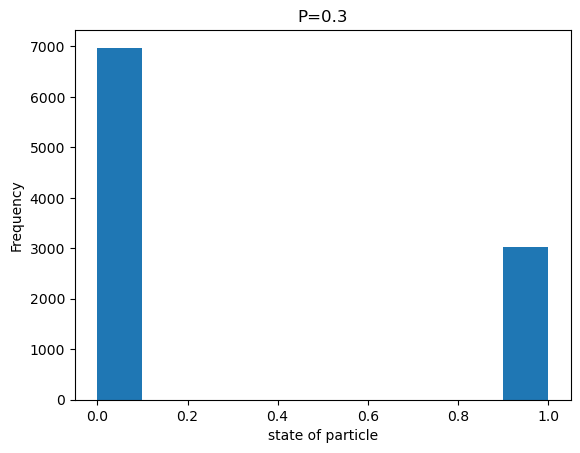

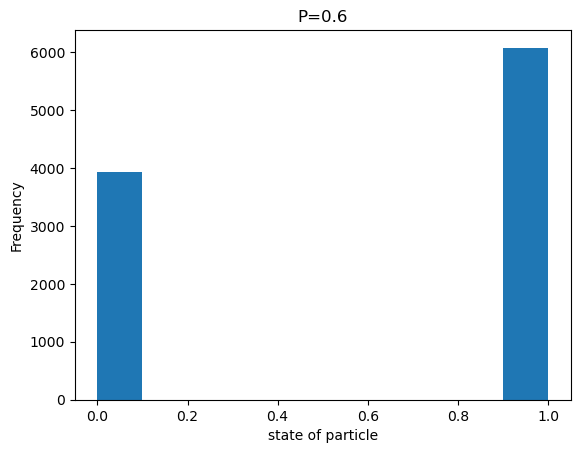

In [33]:
X1=experiment(0.3)[0]
X2=experiment(0.4)[0]
X3=experiment(0.5)[0]
X4=experiment(0.6)[0]
plt.hist(X1)
plt.xlabel('state of particle')
plt.ylabel('Frequency')
plt.title('P=0.3')
plt.show()
plt.hist(X2)
plt.xlabel('state of particle')
plt.title('P=0.4')
plt.ylabel('Frequency')
plt.show()
plt.hist(X3)
plt.xlabel('state of particle')
plt.title('P=0.5')
plt.ylabel('Frequency')
plt.show()
plt.hist(X4)
plt.xlabel('state of particle')
plt.title('P=0.6')
plt.ylabel('Frequency')
plt.show()

##### Comparison: 

The experimental values for mean and variance are calculated as follows: 

In [15]:
average1=experiment(0.3)[1]
average2=experiment(0.4)[1]
average3=experiment(0.5)[1]
average4=experiment(0.6)[1]

variance1=experiment(0.3)[2]
variance2=experiment(0.4)[2]
variance3=experiment(0.5)[2]
variance4=experiment(0.6)[2]


print('The expected values were found to be:', np.round(average1,3),np.round(average2,3),np.round(average3,3),np.round(average4,3))
print('The experimental variances were found to be', np.round(variance1,3),np.round(variance2,3),np.round(variance3,3),np.round(variance4,3))

The expected values were found to be: 0.297 0.405 0.495 0.601
The experimental variances were found to be 0.214 0.239 0.25 0.241


In [16]:
# calculating the percentage errors: 
error_avg1=abs((average1-0.3)/(0.3))*100
error_avg2=abs((average2-0.4)/(0.4))*100
error_avg3=abs((average3-0.5)/(0.5))*100
error_avg4=abs((average4-0.6)/(0.6))*100

error_var1=abs((variance1-0.21)/(0.21))*100
error_var2=abs((variance2-0.24)/(0.24))*100
error_var3=abs((variance3-0.25)/(0.25))*100
error_var4=abs((variance4-0.24)/(0.24))*100

In [17]:
print('The errors in average is',np.round(error_avg1,3),'%',np.round(error_avg2,3),'%',np.round(error_avg3,3),'%',np.round(error_avg4,3),'%')

print('The errors in variance is',np.round(error_var1,3),'%',np.round(error_var2,3),'%',np.round(error_var3,3),'%',np.round(error_var4,3),'%')

The errors in average is 1.133 % 1.35 % 1.02 % 0.183 %
The errors in variance is 1.74 % 0.417 % 0.007 % 0.256 %


##### Variation:

In [18]:
# Now we want to track how the average changes as a function of N
def average(array): #takes the running average of the sweep #takes our particle state array as input
    average=[] #blank list to append
    for i in range(len(array)): #It takes the input as an array of particle states
        average.append(np.sum(array[0:i])/(i+1)) #takes the sum from 0 to i and divides by that num. 
    return average

def var(array): #calculates the variance as a function of N
    var=[] #blank list to append
    for i in range(1,len(array)): #It takes the input as an array of energy values
        var.append(np.sum((array[0:i]-np.mean(array[0:len(array)]))**2)/(i)) #definition of variance for a given N
    return var #this gives a sort of 'running variance'

In [34]:
#Particle state for each probability
X1=experiment(0.3)[0]
X2=experiment(0.4)[0]
X3=experiment(0.5)[0]
X4=experiment(0.6)[0]
#required PLOTTING
plt.scatter(np.linspace(1,10000,10000),average(X1),s=1,label='P=0.3',c='r')
plt.axhline(0.3,c='r',label='P_theoretical=0.3')
plt.scatter(np.linspace(1,10000,10000),average(X2),s=1,label='P=0.4',c='g')
plt.axhline(0.4,c='g',label='P_theoretical=0.4')          
plt.scatter(np.linspace(1,10000,10000),average(X3),s=1,label='P=0.5',c='k')
plt.axhline(0.5,c='k',label='P_theoretical=0.5')            
plt.scatter(np.linspace(1,10000,10000),average(X4),s=1,label='P=0.6',c='darkblue')
plt.axhline(0.6,c='b',label='P_theoretical=0.6')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0.25,0.65)
plt.xlabel('N')
plt.ylabel(r'$\langle n \rangle$')
plt.show()

From the above graph we conclude that for large values of N the expected value becomes equal to the theoretically expected value. Hence it shows that as N goes to infinity, the functions will converge to our expected value. We can see that these values become stabler as N increases. This verifies the central limit theorem

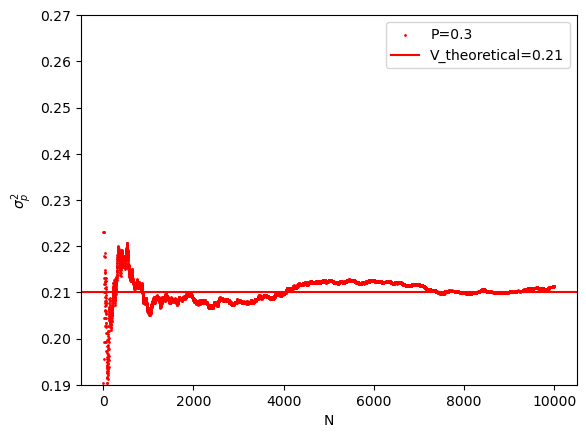

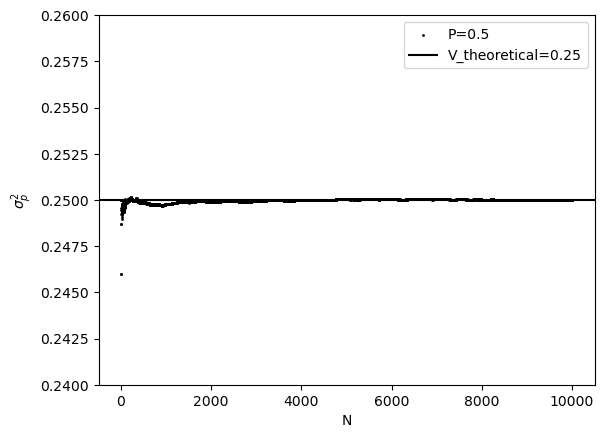

In [20]:
#PLOTTING VARIANCE
plt.scatter(np.linspace(1,9999,9999),var(X1),s=1,label='P=0.3',c='r')
plt.axhline(0.3*0.7,c='r',label='V_theoretical=0.21')
plt.xlabel('N')
plt.ylabel(r'$\sigma^2_p$')
plt.legend()
plt.ylim(0.19,0.27)
plt.show()
plt.scatter(np.linspace(1,9999,9999),var(X2),s=1,label='P=0.4',c='g')
plt.axhline(0.4*0.6,c='g',label='V_theoretical=0.24')
plt.xlabel('N')
plt.ylabel(r'$\sigma^2_p$')
plt.legend()
plt.ylim(0.23,0.27)
plt.show()
plt.scatter(np.linspace(1,9999,9999),var(X3),s=1,label='P=0.5',c='k')
plt.axhline(0.5*0.5,c='k',label='V_theoretical=0.25')
plt.xlabel('N')
plt.ylabel(r'$\sigma^2_p$')
plt.legend()
plt.ylim(0.24,0.26)
plt.show()
plt.scatter(np.linspace(1,9999,9999),var(X4),s=1,label='P=0.6',c='darkblue')
plt.axhline(0.6*0.4,c='b',label='V_theoretical=0.24')
plt.xlabel('N')
plt.ylabel(r'$\sigma^2_p$')
plt.legend()
plt.ylim(0.23,0.27)
plt.show()

From the above graph as well, we can conclude the same thing, for large N, the central limit theorem applies and hence the theoretical value start matching the experimental value for the variance. 

### Problem 6

In [21]:
def c(T): #defining temperature
    epsilon=1
    return np.exp(epsilon/T)/(1+np.exp(epsilon/T))**2*(epsilon**2/T**2)

In [22]:
#Creating data
N=10000 # for 10000 points
tolerance=10**(-2) # this was chosen because the other smaller values, the function was blowing
temperature=np.linspace(tolerance,5,N) 
capacities=np.zeros(N)
for i in range(N):
    capacities[i]=c(temperature[i])

In [23]:
#Finding the peak temperature
peak_T=0 #initialising 
for i in range(len(temperature)):
    if capacities[i]==max(capacities[50:]): #finding the maximum y value in the array
        peak_T+=(temperature[i]) # finding the corresponding temperature to this value
        
#NOTE THAT THIS METHOD IS QUITE CRUDE AND ONLY WORKS IF YOU KNOW THAT THE MAXIMA LIES IN YOUR RANGE OF SEARCH 
# WE KNOW THIS BECAUSE OF THE PLOT BELOW

In [35]:
print('The peak of the function was found to be',peak_T)

The peak of the function was found to be 0.4167256725672568


In [25]:
plt.plot(temperature,capacities,c='darkgreen')
plt.axvline(peak_T,ls='--',c='k')
plt.xlabel(r'Temperature T ($k_b$)')
plt.ylabel(r'Specific heat C')
plt.grid(True)
plt.text(0.6,0.43,r'$T_{max}=$'+str(np.round(peak_T,4)))
plt.title('Tracking the peak temperature value')
plt.show()

We notice that the function exceeds the maximum number the computer can compute to give a runtime error for low temperatures, lesser than 0.01, hence the lower temperature range must begin from 0.01. Similarly we see that after the peak function, the curve decays rapidly. We can decide the higher temperatures on the basis of it attaining some kind of steady state. Hence from the curve, just by checking through the eye, post 5 units of temperature, the curve seems to stabilise. Therefore we can consider 6 to be a higher temperature end. If we try to look at the relationship of the higher temperature terms we obtain the following:

In [26]:
#Splitting the data and creating data frames:
T_high=np.linspace(5,9,1000)
T_low=np.linspace(0.01,0.3,1000)
C_high=np.zeros(len(T_high))
C_low=np.zeros(len(T_low))
for i in range(len(T_high)):
    C_high[i]=c(float(T_high[i]))
    
for i in range(len(T_high)):
    C_low[i]=c(float(T_low[i]))

In [27]:
data = {'High Temperature Values': T_high, 'Specific Heat C(T)':C_high}
df = pd.DataFrame(data=data)
display(df)

High Temperature Values  Specific Heat C(T)
0                   5.000000            0.009901
1                   5.004004            0.009885
2                   5.008008            0.009869
3                   5.012012            0.009854
4                   5.016016            0.009838
..                       ...                 ...
995                 8.983984            0.003088
996                 8.987988            0.003085
997                 8.991992            0.003082
998                 8.995996            0.003080
999                 9.000000            0.003077

[1000 rows x 2 columns]

In [28]:
data = {'Low Temperature Values': T_low, 'Specific Heat C(T)':C_low}
df = pd.DataFrame(data=data)
display(df)

Low Temperature Values  Specific Heat C(T)
0                  0.010000        3.720076e-40
1                  0.010290        5.899923e-39
2                  0.010581        8.027968e-38
3                  0.010871        9.488069e-37
4                  0.011161        9.848128e-36
..                      ...                 ...
995                0.298839        3.679524e-01
996                0.299129        3.683516e-01
997                0.299419        3.687495e-01
998                0.299710        3.691461e-01
999                0.300000        3.695414e-01

[1000 rows x 2 columns]

The slope of the values for higher temperature log-log plot is  -1.9888


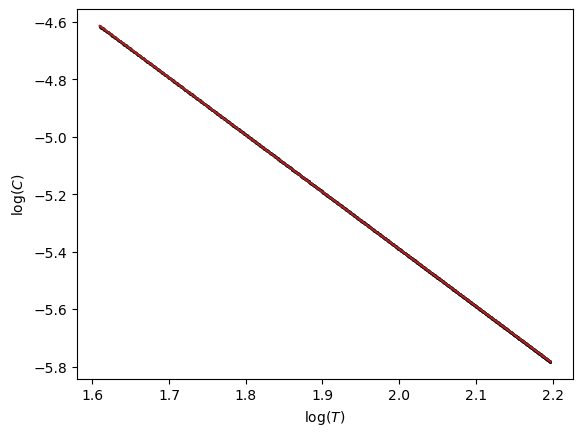

In [29]:
#Plotting logs to see relationship
plt.scatter(np.log(T_high),np.log(C_high),s=1.1,c='k')
m,c=np.polyfit(np.log(T_high),np.log(C_high),1)
plt.plot(np.log(T_high),m*np.log(T_high)+c,c='firebrick')
plt.xlabel(r'$\log(T)$')
plt.ylabel(r'$\log(C)$')
print('The slope of the values for higher temperature log-log plot is'+' ',np.round(m,4))

The slope being close to -2 indicates that for higher temperature values the exponential term which is squared in the denominator decays much faster than the $\frac{1}{T^2}$ term. Hence for higher temperatures, the $\frac{1}{T^2}$ dominates the function, this is also seen in the slope of the log-log curve. 

$$C(T)\sim \frac{1}{T^2}$$



For low temperatures we need to do a further analysis as follows: first factor out $\exp(\epsilon/T)$ from the denominator to give: 

$$c(T)=\frac{\exp (\epsilon / T)}{[1+\exp (\epsilon / T)]^2} \frac{\epsilon^2}{T^2}$$

$$c(T)=\frac{\exp(\epsilon/T)}{\exp(2\epsilon/T)(\exp(-\epsilon/T)+1)^2}\frac{\epsilon^2}{T^2}$$

Factoring out the like terms in the expansion gives: 

$$c(T)=\frac{\exp(-\epsilon/T)}{(\exp(-\epsilon/T)+1)^2}\frac{\epsilon^2}{T^2}$$

For small values of T such that $T\rightarrow 0$ The denominator will converge to 1 and hence our relation for smaller values of T will be in the form: 

$$c(T)\sim \frac{\exp(-\epsilon/T)}{T^2}$$

This is how the function should behave for smaller values of temperature. 